In [1]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv('medium_posts.csv')
df.head()

,published,domain,url
0,2012-08-13 22:54:53.510Z,medium.com,https://medium.com/policy/medium-terms-of-serv...
1,2012-08-13 22:57:17.248Z,medium.com,https://medium.com/policy/medium-privacy-polic...
2,2016-11-04 23:40:43.364Z,medium.com,https://medium.com/@Medium/personalize-your-me...
3,2016-12-24 18:21:13.427Z,medium.com,https://medium.com/holiday-poems/xmas-morning-...
4,2015-09-22 21:37:48.207Z,blog.medium.com,https://blog.medium.com/taking-a-side-on-net-n...


In [2]:
df['published_date'] = pd.to_datetime(df['published']).dt.date
df.head()

,published,domain,url,published_date
0,2012-08-13 22:54:53.510Z,medium.com,https://medium.com/policy/medium-terms-of-serv...,2012-08-13
1,2012-08-13 22:57:17.248Z,medium.com,https://medium.com/policy/medium-privacy-polic...,2012-08-13
2,2016-11-04 23:40:43.364Z,medium.com,https://medium.com/@Medium/personalize-your-me...,2016-11-04
3,2016-12-24 18:21:13.427Z,medium.com,https://medium.com/holiday-poems/xmas-morning-...,2016-12-24
4,2015-09-22 21:37:48.207Z,blog.medium.com,https://blog.medium.com/taking-a-side-on-net-n...,2015-09-22


In [3]:
df_by_day = df['published_date'].value_counts().sort_index()
df_by_day

1970-01-01      2
1970-01-18      3
2003-09-14      1
2004-04-04      1
2004-04-16      1
             ... 
2017-06-23    421
2017-06-24    277
2017-06-25    253
2017-06-26    207
2017-06-27     36
Name: published_date, Length: 1738, dtype: int64

In [4]:
df_by_day = df_by_day.iloc[2:]
df_by_day.head()

2003-09-14    1
2004-04-04    1
2004-04-16    1
2005-09-12    1
2006-02-19    1
Name: published_date, dtype: int64

In [5]:
df_by_day = df_by_day.to_frame()
df_by_day['ds'] = df_by_day.index

In [6]:
df_by_day.rename(columns={"published_date":"y"}, inplace=True)

In [7]:
df_by_day.head()

,y,ds
2003-09-14,1,2003-09-14
2004-04-04,1,2004-04-04
2004-04-16,1,2004-04-16
2005-09-12,1,2005-09-12
2006-02-19,1,2006-02-19


In [8]:
m = Prophet()
m.fit(df_by_day)
future = m.make_future_dataframe(periods=365)
future.tail()

21:12:55 - cmdstanpy - INFO - Chain [1] start processing
21:12:55 - cmdstanpy - INFO - Chain [1] done processing


,ds
2096,2018-06-23
2097,2018-06-24
2098,2018-06-25
2099,2018-06-26
2100,2018-06-27


In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2096,2018-06-23,417.643198,386.825428,447.065143
2097,2018-06-24,419.165458,387.182984,450.326430
2098,2018-06-25,445.453038,414.882153,476.155966
2099,2018-06-26,446.517992,416.686515,476.709454
2100,2018-06-27,447.282035,418.271955,479.738666


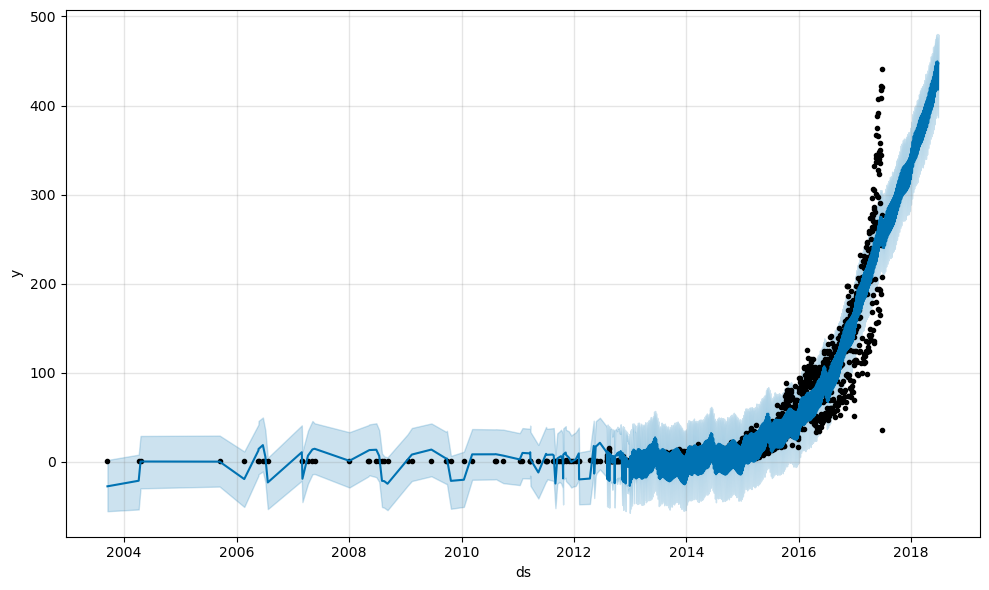

In [10]:
fig1 = m.plot(forecast)

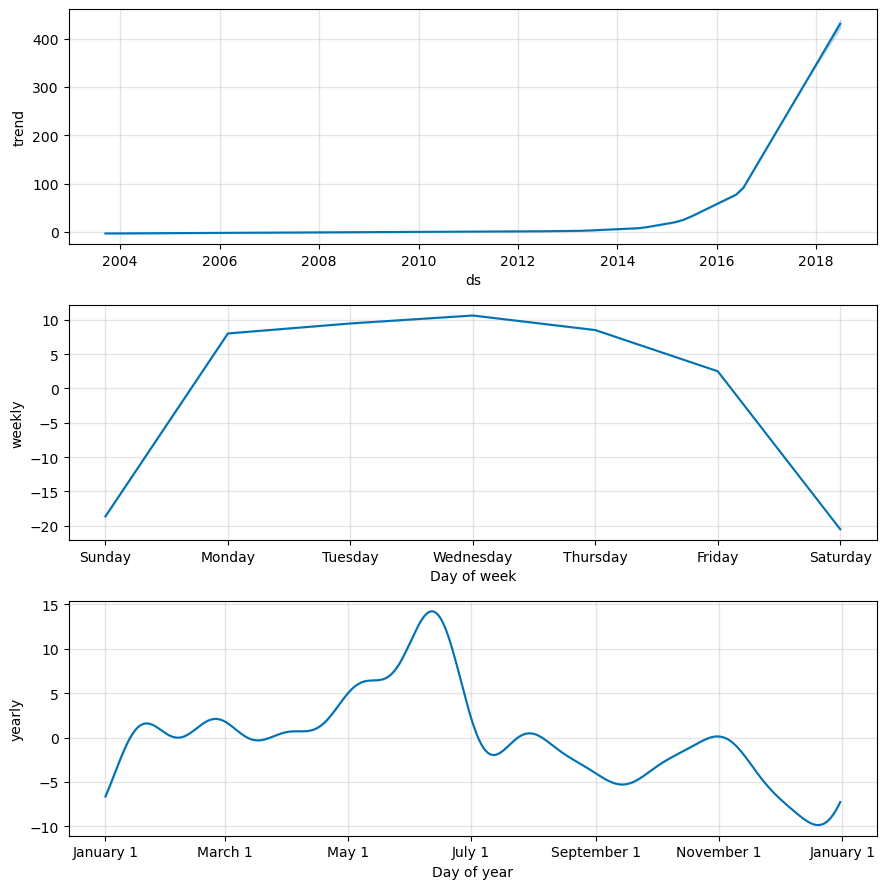

In [11]:
fig2 = m.plot_components(forecast)